In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#to encoded,use logisic regression,make the variables dummies.But if you no need for logistic regression we can use the dataframe itself 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
data = pd.read_csv("E:\\Data scienec Master class\\notes\\machine learning\\datasets\\cardio_train.csv", sep=';')



In [3]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
data.shape

(70000, 13)

# Data Wrangling

In [5]:
data.isnull().sum()#missing values

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
data.duplicated().sum()#Duplicates

0

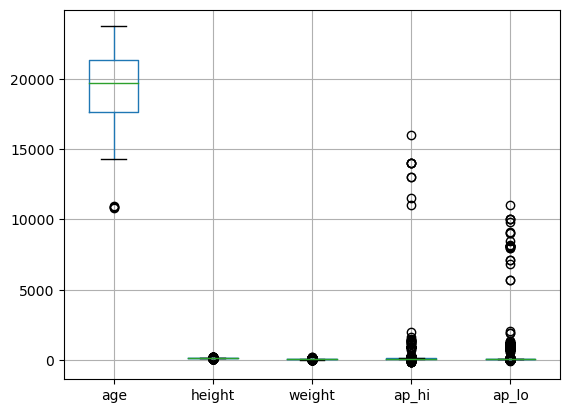

In [7]:
data[["age","height","weight","ap_hi","ap_lo"]].boxplot()
plt.show()

Feature Engineering part-Creating new varibales or modify current variables

In [8]:
data["age"] = pd.to_numeric(data["age"], errors="coerce")


In [9]:
data["age"] = (data["age"] / 365).astype(int)

data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
data["BMI"]=data["weight"]/(data["height"]/100)**2
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [11]:
data.drop(["height","weight"],axis=1,inplace=True)
data.head()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50,2,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,150,100,1,1,0,0,1,1,28.710479
4,4,47,1,100,60,1,1,0,0,0,0,23.011177


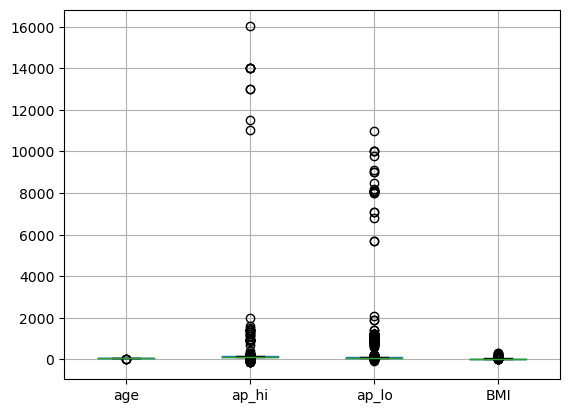

In [12]:
data[["age","ap_hi","ap_lo","BMI"]].boxplot()
plt.show()

In [13]:
#remove outliers in ap_hi and ap_lo
data_num=data[["age","ap_hi","ap_lo","BMI"]]#take numeric data in to seperate data frame

In [14]:
Q1=data_num.quantile(0.25)
Q3=data_num.quantile(0.75)
IQR=Q3-Q1

In [15]:
IQR

age      10.000000
ap_hi    20.000000
ap_lo    10.000000
BMI       6.347107
dtype: float64

In [16]:
Out_rows=(((data_num<(Q1-1.5*IQR))|(data_num>(Q3+1.5*IQR)))).any(axis=1)
Out_rows

0        False
1        False
2        False
3        False
4         True
         ...  
69995    False
69996     True
69997     True
69998    False
69999    False
Length: 70000, dtype: bool

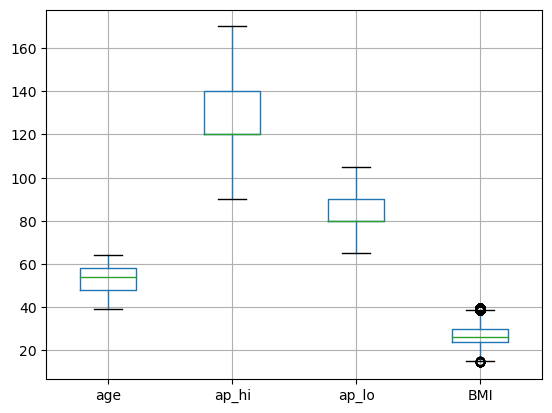

In [17]:
data=data[~Out_rows]
data[["age","ap_hi","ap_lo","BMI"]].boxplot()
plt.show()

In [18]:
data

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50,2,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,150,100,1,1,0,0,1,1,28.710479
5,8,60,1,120,80,2,2,0,0,0,0,29.384676
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,53,1,130,90,1,1,0,0,1,1,23.661439
69994,99992,57,1,150,80,1,1,0,0,1,1,29.384757
69995,99993,52,2,120,80,1,1,1,0,1,0,26.927438
69998,99998,61,1,135,80,1,2,0,0,0,1,27.099251


# Data Analysis/EDA

In [19]:
#uni variate Analysis

In [20]:
data[["age","ap_hi","ap_lo","BMI"]].describe()#Numerical Summaries

,age,ap_hi,ap_lo,BMI
count,62745.000000,62745.000000,62745.000000,62745.000000
mean,52.882413,126.404319,81.689537,27.034727
std,6.746333,14.296927,7.673500,4.406103
min,39.000000,90.000000,65.000000,14.479500
25%,48.000000,120.000000,80.000000,23.875115
50%,54.000000,120.000000,80.000000,26.222222
75%,58.000000,140.000000,90.000000,29.757585
max,64.000000,170.000000,105.000000,39.736121


In [21]:
data["cardio"].value_counts()

0    31783
1    30962
Name: cardio, dtype: int64

In [22]:
print(data["cardio"].dtype)#Make sure the cardio column is numeric
data["cardio"] = pd.to_numeric(data["cardio"], errors="coerce")


int64


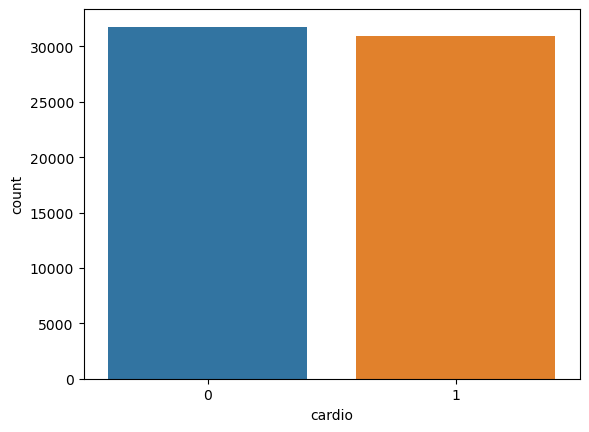

In [23]:
sns.countplot(data=data,x=data["cardio"])
plt.show()

In [24]:
#Bi-variate Analysis


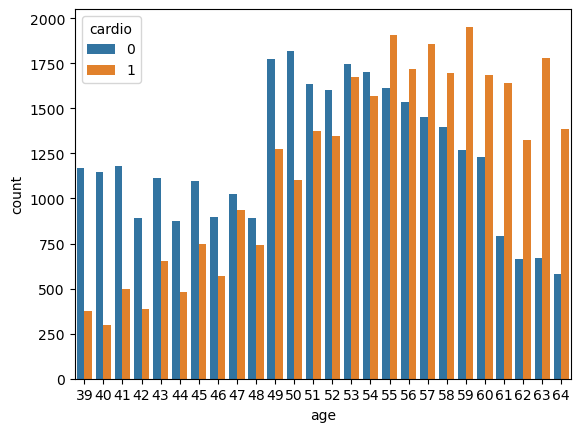

In [25]:
sns.countplot(data=data,x=data["age"],hue="cardio")
plt.show()

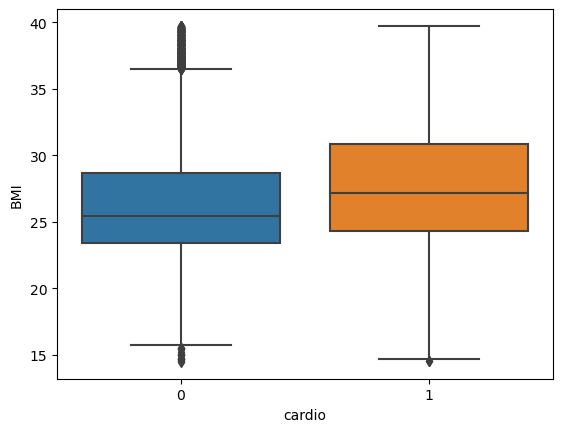

In [26]:
sns.boxplot(x="cardio",y="BMI",data=data)
plt.show()


In [27]:
data[["age","ap_hi","ap_lo","BMI"]].corr()#correlations of each numerical variables

,age,ap_hi,ap_lo,BMI
age,1.000000,0.202365,0.144933,0.103261
ap_hi,0.202365,1.000000,0.705185,0.242064
ap_lo,0.144933,0.705185,1.000000,0.213491
BMI,0.103261,0.242064,0.213491,1.000000


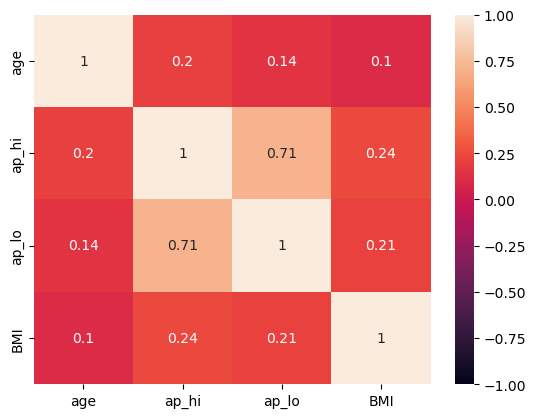

In [28]:
sns.heatmap(data[["age","ap_hi","ap_lo","BMI"]].corr(),annot=True,vmin=-1,vmax=1)
plt.show()

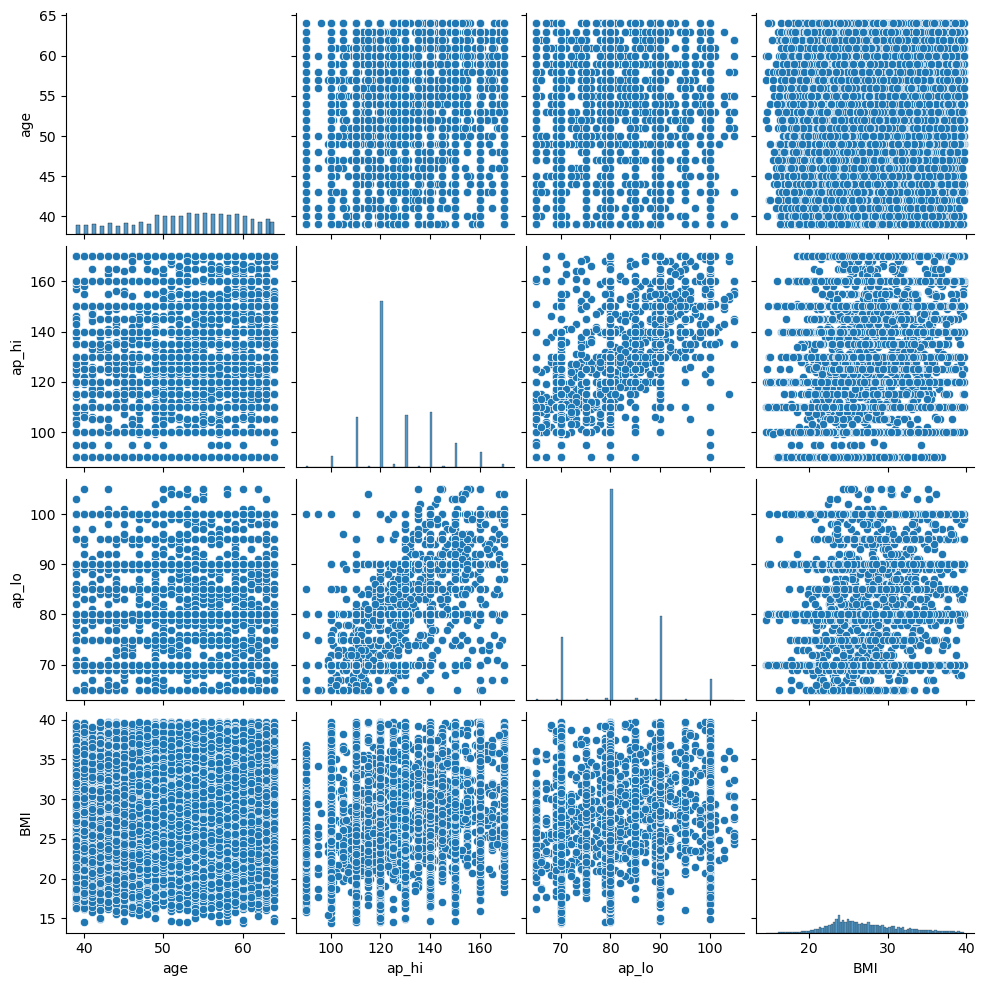

In [29]:
sns.pairplot(data[["age","ap_hi","ap_lo","BMI"]])
plt.show()

In [30]:
df=data[["age","ap_hi","ap_lo","BMI"]]#create new data frame for camapre pairplot with cardio arguement
df["cardio"]=["Yes" if m==1 else "No" for m in data["cardio"]]
df.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_20124\3346173717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cardio"]=["Yes" if m==1 else "No" for m in data["cardio"]]


,age,ap_hi,ap_lo,BMI,cardio
0,50,110,80,21.967120,No
1,55,140,90,34.927679,Yes
2,51,130,70,23.507805,Yes
3,48,150,100,28.710479,Yes
5,60,120,80,29.384676,No


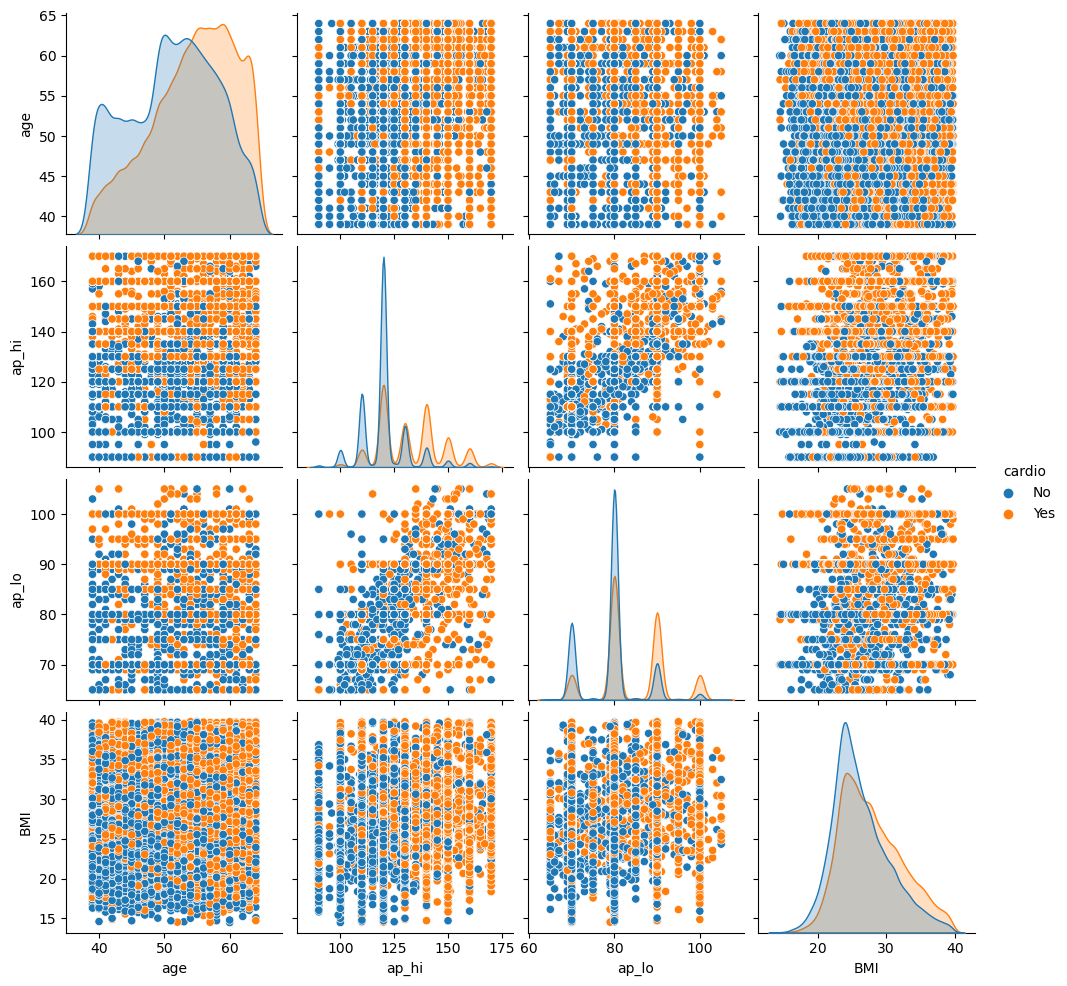

In [31]:
sns.pairplot(df,hue="cardio")
plt.show()

In [32]:
data.head()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50,2,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,140,90,3,1,0,0,1,1,34.927679
2,2,51,1,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,150,100,1,1,0,0,1,1,28.710479
5,8,60,1,120,80,2,2,0,0,0,0,29.384676


In [33]:
data.drop("id",axis=1,inplace=True)


In [34]:
data=data.reindex(columns=["age","ap_hi","ap_lo","BMI","gender","cholesterol","gluc","smoke","alco","active","cardio"])
data.head()

,age,ap_hi,ap_lo,BMI,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,2,1,1,0,0,1,0
1,55,140,90,34.927679,1,3,1,0,0,1,1
2,51,130,70,23.507805,1,3,1,0,0,0,1
3,48,150,100,28.710479,2,1,1,0,0,1,1
5,60,120,80,29.384676,1,2,2,0,0,0,0


In [35]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [36]:
le=LabelEncoder() 
data["gender"]=le.fit_transform(data["gender"])
data.head()

,age,ap_hi,ap_lo,BMI,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,1,1,1,0,0,1,0
1,55,140,90,34.927679,0,3,1,0,0,1,1
2,51,130,70,23.507805,0,3,1,0,0,0,1
3,48,150,100,28.710479,1,1,1,0,0,1,1
5,60,120,80,29.384676,0,2,2,0,0,0,0


In [37]:
#onehot encoding ,because get dummies function can't use

In [38]:
ohe=OneHotEncoder()

In [39]:
ohot_encoded_1=ohe.fit_transform(data["cholesterol"].values.reshape(len(data["cholesterol"].values),1)).toarray()#cholestrol column convert into dummies when 1==>[1,0,0]likewise
ohot_encoded_1=ohot_encoded_1[:,1:].astype(int)#filterout th 2,3 columns
df_ohot_1=pd.DataFrame(ohot_encoded_1,columns=["Above Nor Chol","Well Above Nor Chol"])
df_ohot_1

,Above Nor Chol,Well Above Nor Chol
0,0,0
1,0,1
2,0,1
3,0,0
4,1,0
...,...,...
62740,0,0
62741,0,0
62742,0,0
62743,0,0


In [40]:
ohot_encoded_2=ohe.fit_transform(data["gluc"].values.reshape(len(data["gluc"].values),1)).toarray()
ohot_encoded_2=ohot_encoded_2[:,1:].astype(int)#filterout th 2,3 columns
df_ohot_2=pd.DataFrame(ohot_encoded_2,columns=["Above Nor Gluc","Well Above Nor Gluc"])
df_ohot_2

,Above Nor Gluc,Well Above Nor Gluc
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
62740,0,0
62741,0,0
62742,0,0
62743,1,0


In [41]:
data# when call it all outlier rows are not there,in above data frame all the lines here 

,age,ap_hi,ap_lo,BMI,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,1,1,1,0,0,1,0
1,55,140,90,34.927679,0,3,1,0,0,1,1
2,51,130,70,23.507805,0,3,1,0,0,0,1
3,48,150,100,28.710479,1,1,1,0,0,1,1
5,60,120,80,29.384676,0,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69993,53,130,90,23.661439,0,1,1,0,0,1,1
69994,57,150,80,29.384757,0,1,1,0,0,1,1
69995,52,120,80,26.927438,1,1,1,1,0,1,0
69998,61,135,80,27.099251,0,1,2,0,0,0,1


In [42]:
data.reset_index(inplace =True)
data

,index,age,ap_hi,ap_lo,BMI,gender,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,110,80,21.967120,1,1,1,0,0,1,0
1,1,55,140,90,34.927679,0,3,1,0,0,1,1
2,2,51,130,70,23.507805,0,3,1,0,0,0,1
3,3,48,150,100,28.710479,1,1,1,0,0,1,1
4,5,60,120,80,29.384676,0,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
62740,69993,53,130,90,23.661439,0,1,1,0,0,1,1
62741,69994,57,150,80,29.384757,0,1,1,0,0,1,1
62742,69995,52,120,80,26.927438,1,1,1,1,0,1,0
62743,69998,61,135,80,27.099251,0,1,2,0,0,0,1


In [43]:
data.drop("index",axis=1,inplace=True)
data.head()

,age,ap_hi,ap_lo,BMI,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,1,1,1,0,0,1,0
1,55,140,90,34.927679,0,3,1,0,0,1,1
2,51,130,70,23.507805,0,3,1,0,0,0,1
3,48,150,100,28.710479,1,1,1,0,0,1,1
4,60,120,80,29.384676,0,2,2,0,0,0,0


In [44]:
data

,age,ap_hi,ap_lo,BMI,gender,cholesterol,gluc,smoke,alco,active,cardio
0,50,110,80,21.967120,1,1,1,0,0,1,0
1,55,140,90,34.927679,0,3,1,0,0,1,1
2,51,130,70,23.507805,0,3,1,0,0,0,1
3,48,150,100,28.710479,1,1,1,0,0,1,1
4,60,120,80,29.384676,0,2,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
62740,53,130,90,23.661439,0,1,1,0,0,1,1
62741,57,150,80,29.384757,0,1,1,0,0,1,1
62742,52,120,80,26.927438,1,1,1,1,0,1,0
62743,61,135,80,27.099251,0,1,2,0,0,0,1


In [45]:
x=pd.concat([data.iloc[:,:10],df_ohot_1,df_ohot_2],axis =1)#independent data
x

,age,ap_hi,ap_lo,BMI,gender,cholesterol,gluc,smoke,alco,active,Above Nor Chol,Well Above Nor Chol,Above Nor Gluc,Well Above Nor Gluc
0,50,110,80,21.967120,1,1,1,0,0,1,0,0,0,0
1,55,140,90,34.927679,0,3,1,0,0,1,0,1,0,0
2,51,130,70,23.507805,0,3,1,0,0,0,0,1,0,0
3,48,150,100,28.710479,1,1,1,0,0,1,0,0,0,0
4,60,120,80,29.384676,0,2,2,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62740,53,130,90,23.661439,0,1,1,0,0,1,0,0,0,0
62741,57,150,80,29.384757,0,1,1,0,0,1,0,0,0,0
62742,52,120,80,26.927438,1,1,1,1,0,1,0,0,0,0
62743,61,135,80,27.099251,0,1,2,0,0,0,0,0,1,0


In [46]:
x.head()

,age,ap_hi,ap_lo,BMI,gender,cholesterol,gluc,smoke,alco,active,Above Nor Chol,Well Above Nor Chol,Above Nor Gluc,Well Above Nor Gluc
0,50,110,80,21.967120,1,1,1,0,0,1,0,0,0,0
1,55,140,90,34.927679,0,3,1,0,0,1,0,1,0,0
2,51,130,70,23.507805,0,3,1,0,0,0,0,1,0,0
3,48,150,100,28.710479,1,1,1,0,0,1,0,0,0,0
4,60,120,80,29.384676,0,2,2,0,0,0,1,0,1,0


In [47]:
x.drop(["cholesterol","gluc"],axis=1,inplace=True)

In [48]:
x.head()

,age,ap_hi,ap_lo,BMI,gender,smoke,alco,active,Above Nor Chol,Well Above Nor Chol,Above Nor Gluc,Well Above Nor Gluc
0,50,110,80,21.967120,1,0,0,1,0,0,0,0
1,55,140,90,34.927679,0,0,0,1,0,1,0,0
2,51,130,70,23.507805,0,0,0,0,0,1,0,0
3,48,150,100,28.710479,1,0,0,1,0,0,0,0
4,60,120,80,29.384676,0,0,0,0,1,0,1,0


In [49]:
x=x.values # convert into array form
y=data.iloc[:,10].values

In [50]:
x[:,:4]

array([[ 50.        , 110.        ,  80.        ,  21.96712018],
       [ 55.        , 140.        ,  90.        ,  34.92767916],
       [ 51.        , 130.        ,  70.        ,  23.50780533],
       ...,
       [ 52.        , 120.        ,  80.        ,  26.92743764],
       [ 61.        , 135.        ,  80.        ,  27.09925101],
       [ 56.        , 120.        ,  80.        ,  24.91349481]])

In [51]:
#standardizing can take better outcome
Sc=StandardScaler()

In [52]:
x[:,:4]=Sc.fit_transform(x[:,:4])
x[:,:4]

array([[-0.42725964, -1.14741093, -0.2201799 , -1.15014289],
       [ 0.31388961,  0.95095888,  1.08301675,  1.79138238],
       [-0.27902979,  0.25150228, -1.52337654, -0.80046937],
       ...,
       [-0.13079994, -0.44795433, -0.2201799 , -0.02435046],
       [ 1.20326872,  0.60123058, -0.2201799 ,  0.01464426],
       [ 0.46211946, -0.44795433, -0.2201799 , -0.48143443]])

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [54]:
model1=KNeighborsClassifier(n_neighbors=50)
model2=LogisticRegression()
model3=SVC(kernel="rbf",C=1)
model4=RandomForestClassifier(n_estimators=500)

In [55]:
T1=("KNN", model1)
T2=("lgr", model2)
T3=("svm", model3)
T4=("rf", model4)

model=VotingClassifier(estimators=[T1,T2,T3,T4],voting="hard")

In [56]:
model.fit(x_train,y_train,)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=50)),
                             ('lgr', LogisticRegression()), ('svm', SVC(C=1)),
                             ('rf', RandomForestClassifier(n_estimators=500))])

In [57]:
y_pred=model.predict(x_test)

In [58]:
confusion_matrix(y_test,y_pred)

array([[5195, 1220],
       [2228, 3906]], dtype=int64)

In [59]:
accuracy_score(y_test,y_pred)

0.725237070682923

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75      6415
           1       0.76      0.64      0.69      6134

    accuracy                           0.73     12549
   macro avg       0.73      0.72      0.72     12549
weighted avg       0.73      0.73      0.72     12549

